**DATA COLLECTION & PREPROCESSING:**

In [ ]:
!pip install requests

In [ ]:
import requests
import pandas as pd
from datetime import datetime

Bitcoin Historical Data:

In [ ]:
#API request parameters for Bitcoin history:

API_KEY = 'E8161396-9ABE-499B-9157-80D24E59D6F6'
BASE_URL = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_GBP/history'

headers = {
    'X-CoinAPI-Key': API_KEY
}

params = {
    'period_id': '1DAY',
    'time_start': '2010-01-01T00:00:00',
    'limit': 10000
}

In [ ]:
#Data fetch:

response = requests.get(BASE_URL, headers=headers, params=params)

if response.status_code == 200:
  data = response.json()
else:
  print(f"Error fetching data: {response.status_code}")
  data = []

In [ ]:
#Coverting Bitcoin Great British Pound History data to DataFrame:

bitcoin_history = pd.DataFrame(data)

bitcoin_history['time_period_start'] = pd.to_datetime(bitcoin_history['time_period_start'])
bitcoin_history['time_period_end'] = pd.to_datetime(bitcoin_history['time_period_end'])

bitcoin_history.to_csv('bitcoin_gbp_history.csv', index=False)
bitcoin_history

#this data is updated when data is requested from the coin API

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-08-12 00:00:00+00:00,2020-08-13 00:00:00+00:00,2020-08-12T14:08:07.2230000Z,2020-08-12T23:59:09.6710000Z,8899.63,8925.00,8825.00,8871.11,98.715842,1655
1,2020-08-13 00:00:00+00:00,2020-08-14 00:00:00+00:00,2020-08-13T00:00:36.9300000Z,2020-08-13T23:54:24.8170000Z,8871.10,9033.00,8634.00,9018.22,275.446180,4075
2,2020-08-14 00:00:00+00:00,2020-08-15 00:00:00+00:00,2020-08-14T00:00:18.1280000Z,2020-08-14T23:59:47.2740000Z,9028.00,9065.00,8915.09,9015.36,161.770764,2833
3,2020-08-15 00:00:00+00:00,2020-08-16 00:00:00+00:00,2020-08-15T00:00:53.2600000Z,2020-08-15T23:46:30.8660000Z,9021.10,9166.77,8955.00,9082.35,136.519704,2341
4,2020-08-16 00:00:00+00:00,2020-08-17 00:00:00+00:00,2020-08-16T00:02:45.3140000Z,2020-08-16T23:48:30.3770000Z,9088.89,9130.00,8960.00,9091.44,90.173370,1290
...,...,...,...,...,...,...,...,...,...,...
1458,2024-08-21 00:00:00+00:00,2024-08-22 00:00:00+00:00,2024-08-21T00:01:24.7650000Z,2024-08-21T23:56:17.9970000Z,45314.00,47223.00,45138.00,46741.00,36.489066,1171
1459,2024-08-22 00:00:00+00:00,2024-08-23 00:00:00+00:00,2024-08-22T00:16:36.2200000Z,2024-08-22T23:59:54.9810000Z,46655.00,46847.00,45690.00,46116.00,7.896838,625
1460,2024-08-23 00:00:00+00:00,2024-08-24 00:00:00+00:00,2024-08-23T00:00:01.1720000Z,2024-08-23T23:51:57.9060000Z,46113.00,49167.00,46107.00,48346.00,48.005942,1635
1461,2024-08-24 00:00:00+00:00,2024-08-25 00:00:00+00:00,2024-08-24T00:00:01.2740000Z,2024-08-24T23:54:43.1480000Z,48471.00,48782.00,48119.00,48514.00,17.093799,722


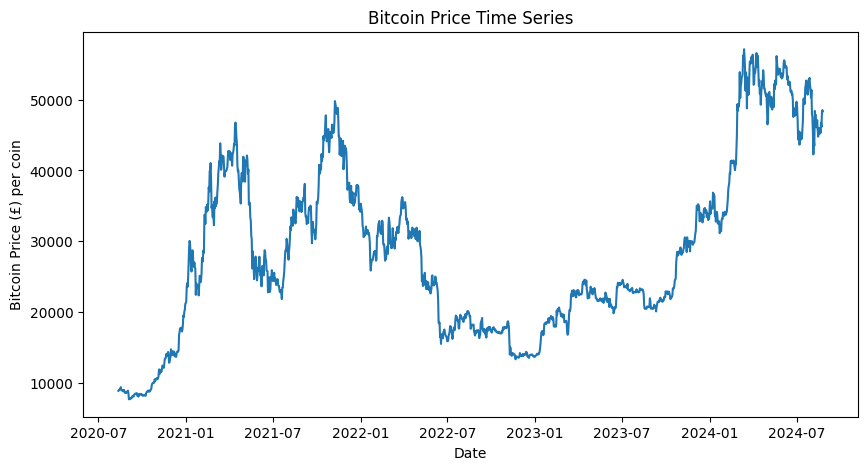

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(bitcoin_history['time_period_start'], bitcoin_history['price_close'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Time Series')
plt.show()

In [ ]:
bitcoin_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   time_period_start  1463 non-null   datetime64[ns, UTC]
 1   time_period_end    1463 non-null   datetime64[ns, UTC]
 2   time_open          1463 non-null   object             
 3   time_close         1463 non-null   object             
 4   price_open         1463 non-null   float64            
 5   price_high         1463 non-null   float64            
 6   price_low          1463 non-null   float64            
 7   price_close        1463 non-null   float64            
 8   volume_traded      1463 non-null   float64            
 9   trades_count       1463 non-null   int64              
dtypes: datetime64[ns, UTC](2), float64(5), int64(1), object(2)
memory usage: 114.4+ KB


In [ ]:
missing_values = bitcoin_history.isnull().any()
print(missing_values)

time_period_start    False
time_period_end      False
time_open            False
time_close           False
price_open           False
price_high           False
price_low            False
price_close          False
volume_traded        False
trades_count         False
dtype: bool


Ethereum Historical Data:

In [ ]:
#API request parameters for Ethereum history:

API_KEY = 'E8161396-9ABE-499B-9157-80D24E59D6F6'
BASE_URL = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_ETH_GBP/history'

headers = {
    'X-CoinAPI-Key': API_KEY
}

params = {
    'period_id': '1DAY',
    'time_start': '2015-08-07T00:00:00',
    'limit': 10000
}

In [ ]:
#Data fetch:

response = requests.get(BASE_URL, headers=headers, params=params)

if response.status_code == 200:
  data = response.json()
else:
  print(f"Error fetching data: {response.status_code}")
  data = []

In [ ]:
#Coverting Ethereum Great British Pound History data to DataFrame:

ethereum_history = pd.DataFrame(data)

ethereum_history['time_period_start'] = pd.to_datetime(ethereum_history['time_period_start'])
ethereum_history['time_period_end'] = pd.to_datetime(ethereum_history['time_period_end'])

ethereum_history.to_csv('ethereum_gbp_history.csv', index=False)
ethereum_history

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-08-12 00:00:00+00:00,2020-08-13 00:00:00+00:00,2020-08-12T14:11:16.7390000Z,2020-08-12T23:40:02.3750000Z,296.23,299.55,292.82,297.32,438.016463,413
1,2020-08-13 00:00:00+00:00,2020-08-14 00:00:00+00:00,2020-08-13T00:01:53.6250000Z,2020-08-13T23:57:47.7800000Z,296.57,330.00,288.54,324.83,3695.773314,2411
2,2020-08-14 00:00:00+00:00,2020-08-15 00:00:00+00:00,2020-08-14T00:00:17.3550000Z,2020-08-14T23:49:39.2380000Z,325.37,339.88,320.78,335.17,1420.201310,1215
3,2020-08-15 00:00:00+00:00,2020-08-16 00:00:00+00:00,2020-08-15T00:00:33.1910000Z,2020-08-15T23:57:33.6970000Z,335.83,338.76,327.69,331.45,1352.012173,1242
4,2020-08-16 00:00:00+00:00,2020-08-17 00:00:00+00:00,2020-08-16T00:01:00.2740000Z,2020-08-16T23:53:18.8120000Z,331.24,333.76,316.00,331.19,2154.365349,1051
...,...,...,...,...,...,...,...,...,...,...
1459,2024-08-21 00:00:00+00:00,2024-08-22 00:00:00+00:00,2024-08-21T00:02:54.7530000Z,2024-08-21T23:54:39.7550000Z,1975.80,2029.60,1948.00,2008.80,417.651268,1784
1460,2024-08-22 00:00:00+00:00,2024-08-23 00:00:00+00:00,2024-08-22T00:01:15.5370000Z,2024-08-22T23:57:12.9060000Z,2010.70,2018.10,1981.00,2002.50,546.554187,2070
1461,2024-08-23 00:00:00+00:00,2024-08-24 00:00:00+00:00,2024-08-23T00:10:25.1600000Z,2024-08-23T23:47:59.7470000Z,2005.40,2118.30,1999.70,2090.20,706.593288,2672
1462,2024-08-24 00:00:00+00:00,2024-08-25 00:00:00+00:00,2024-08-24T00:07:49.7530000Z,2024-08-24T23:35:20.6960000Z,2092.80,2132.70,2069.50,2090.40,158.242683,556


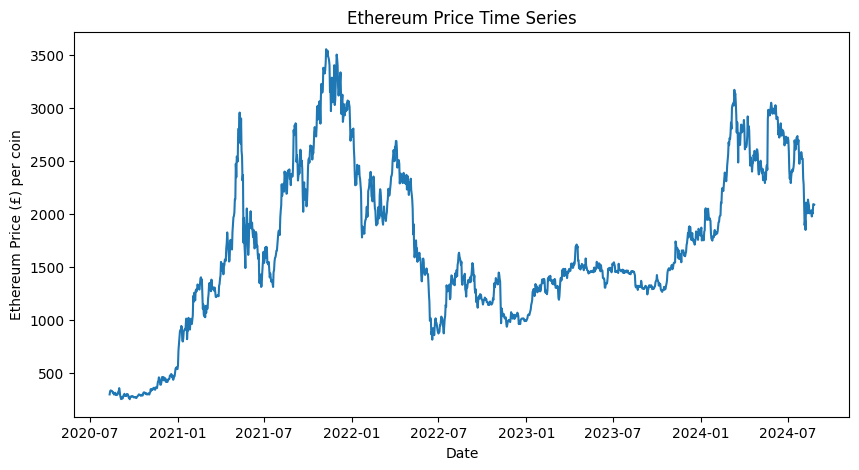

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ethereum_history['time_period_start'], ethereum_history['price_close'])
plt.xlabel('Date')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Time Series')
plt.show()

In [ ]:
ethereum_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   time_period_start  1464 non-null   datetime64[ns, UTC]
 1   time_period_end    1464 non-null   datetime64[ns, UTC]
 2   time_open          1464 non-null   object             
 3   time_close         1464 non-null   object             
 4   price_open         1464 non-null   float64            
 5   price_high         1464 non-null   float64            
 6   price_low          1464 non-null   float64            
 7   price_close        1464 non-null   float64            
 8   volume_traded      1464 non-null   float64            
 9   trades_count       1464 non-null   int64              
dtypes: datetime64[ns, UTC](2), float64(5), int64(1), object(2)
memory usage: 114.5+ KB


In [ ]:
missing_values = ethereum_history.isnull().any()
print(missing_values)

time_period_start    False
time_period_end      False
time_open            False
time_close           False
price_open           False
price_high           False
price_low            False
price_close          False
volume_traded        False
trades_count         False
dtype: bool


Dogecoin Historical Data:

In [ ]:
#API request parameters for Dogecoin history:

API_KEY = 'E8161396-9ABE-499B-9157-80D24E59D6F6'
BASE_URL = 'https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_DOGE_GBP/history'

headers = {
    'X-CoinAPI-Key': API_KEY
}

params = {
    'period_id': '1DAY',
    'time_start': '2010-01-01T00:00:00',
    'limit': 10000
}

In [ ]:
#Data fetch:

response = requests.get(BASE_URL, headers=headers, params=params)

if response.status_code == 200:
  data = response.json()
else:
  print(f"Error fetching data: {response.status_code}")
  data = []

In [ ]:
#Coverting Dogecoin Great British Pound History data to DataFrame:

dogecoin_history = pd.DataFrame(data)

dogecoin_history['time_period_start'] = pd.to_datetime(dogecoin_history['time_period_start'])
dogecoin_history['time_period_end'] = pd.to_datetime(dogecoin_history['time_period_end'])

dogecoin_history.to_csv('dogecoin_gbp_history.csv', index=False)
dogecoin_history

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2021-02-09 00:00:00+00:00,2021-02-10 00:00:00+00:00,2021-02-09T10:00:00.0000000Z,2021-02-09T23:59:47.1660000Z,0.05617,0.21000,0.04281,0.05109,28650921.7,17105
1,2021-02-10 00:00:00+00:00,2021-02-11 00:00:00+00:00,2021-02-10T00:00:16.7650000Z,2021-02-10T23:59:40.4080000Z,0.05079,0.06000,0.04871,0.05279,44401228.8,20815
2,2021-02-11 00:00:00+00:00,2021-02-12 00:00:00+00:00,2021-02-11T00:00:01.1530000Z,2021-02-11T02:18:58.1910000Z,0.05291,0.05370,0.05175,0.05284,1706789.0,1096
3,2021-02-12 00:00:00+00:00,2021-02-13 00:00:00+00:00,2021-02-12T00:00:00.9110000Z,2021-02-12T23:59:37.9120000Z,0.05084,0.05299,0.04395,0.05067,26397567.1,15109
4,2021-02-13 00:00:00+00:00,2021-02-14 00:00:00+00:00,2021-02-13T00:00:04.9780000Z,2021-02-13T23:59:46.9880000Z,0.05085,0.05218,0.04791,0.04806,15301432.9,10547
...,...,...,...,...,...,...,...,...,...,...
1042,2023-12-25 00:00:00+00:00,2023-12-26 00:00:00+00:00,2023-12-25T00:06:38.2490000Z,2023-12-25T23:55:25.4670000Z,0.07554,0.07780,0.07436,0.07682,425667.0,3258
1043,2023-12-26 00:00:00+00:00,2023-12-27 00:00:00+00:00,2023-12-26T00:05:51.0180000Z,2023-12-26T23:47:45.7250000Z,0.07677,0.07701,0.07216,0.07410,873375.0,4147
1044,2023-12-27 00:00:00+00:00,2023-12-28 00:00:00+00:00,2023-12-27T00:37:19.9220000Z,2023-12-27T23:57:19.6070000Z,0.07411,0.07689,0.07302,0.07649,712867.0,4318
1045,2023-12-28 00:00:00+00:00,2023-12-29 00:00:00+00:00,2023-12-28T00:14:13.5340000Z,2023-12-28T22:22:08.4790000Z,0.07680,0.07907,0.07409,0.07665,1124683.0,4584


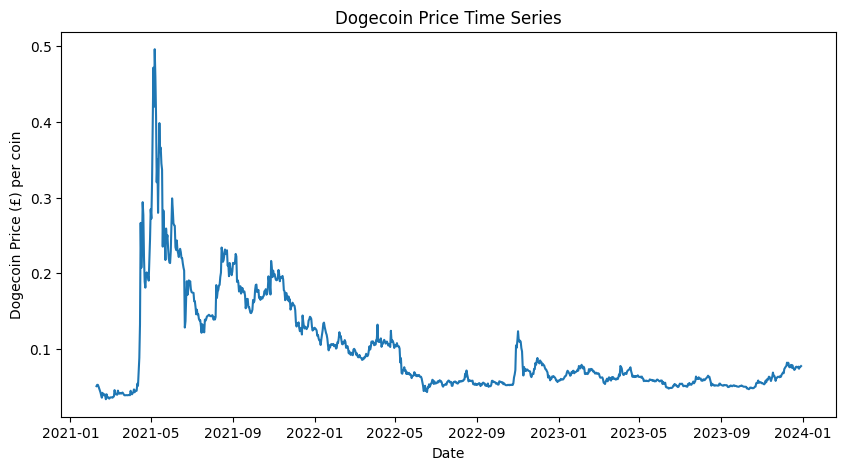

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(dogecoin_history['time_period_start'], dogecoin_history['price_close'])
plt.xlabel('Date')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Time Series')
plt.show()

In [ ]:
dogecoin_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   time_period_start  1047 non-null   datetime64[ns, UTC]
 1   time_period_end    1047 non-null   datetime64[ns, UTC]
 2   time_open          1047 non-null   object             
 3   time_close         1047 non-null   object             
 4   price_open         1047 non-null   float64            
 5   price_high         1047 non-null   float64            
 6   price_low          1047 non-null   float64            
 7   price_close        1047 non-null   float64            
 8   volume_traded      1047 non-null   float64            
 9   trades_count       1047 non-null   int64              
dtypes: datetime64[ns, UTC](2), float64(5), int64(1), object(2)
memory usage: 81.9+ KB


In [ ]:
missing_values = dogecoin_history.isnull().any()
print(missing_values)

time_period_start    False
time_period_end      False
time_open            False
time_close           False
price_open           False
price_high           False
price_low            False
price_close          False
volume_traded        False
trades_count         False
dtype: bool


**MODEL DEVELOPMENT:**

LSTM model for Bitcoin price prediction:

In [ ]:
#Data scaling:

from sklearn.preprocessing import MinMaxScaler

data = bitcoin_history['price_close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

import numpy as np

sequence_length = 30 #Previous time steps (1 month)
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
  x_data.append(scaled_data[i-sequence_length:i,0])
  y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1],1))
#reshape to be 3D (samples, time steps, features)

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8) # 80% of the data will be used for training and 20% for testing
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Model creation:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential() #layers can be stacked sequentially

model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#50 units = neurons

#returning sequences means that the output is a sequence of data which is necessary for
#stacking another LSTM layer

#x.train.shape[1] is the number of time steps in each input sequence
#,1 establishes that each time step has one feature

model.add(LSTM(units = 50, return_sequences=False))
#return_sequences = False makes sure the output is a single output
#which is suitable for passing to a Dense layer

model.add(Dense(units=25)) #Adds a fully connected layer with 25 units (neurons)
model.add(Dense(units=1))
#This layer will output a single value (for the prediction of a single continous value)
#such as the next closing price

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#The adam optimizer adapts the learning rate during the training of neural networks

#In neural networks, layers consists of neurons that have specific computations run on them,
#to then pass the output data to the next layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs = 2)

#batch size is the number of samples used in one iteration to update the LSTM model's weights

#epochs is the number of times the training dataset is passed thought the model,
#more epochs can learn better but risk overfitting

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0379
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Lost: {loss}')

#The Loss value can establish how well the model's predictions match actual values
#a lower loss value establishes better performance

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
Test Lost: 0.0028584394603967667


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #transform predictions to original scale

y_test = scaler.inverse_transform(y_test.reshape(-1,1)) #transform actual values to orginal scale

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


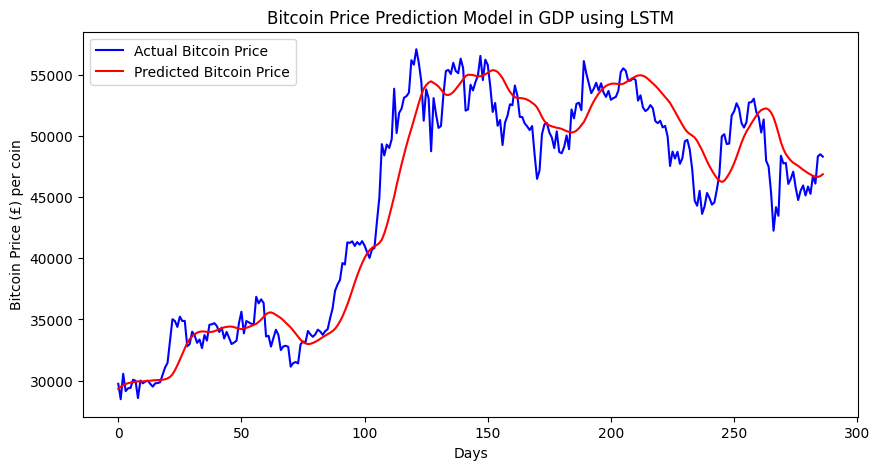

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Bitcoin Price')
plt.plot(predictions, color='red', label = 'Predicted Bitcoin Price')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction Model in GDP using LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

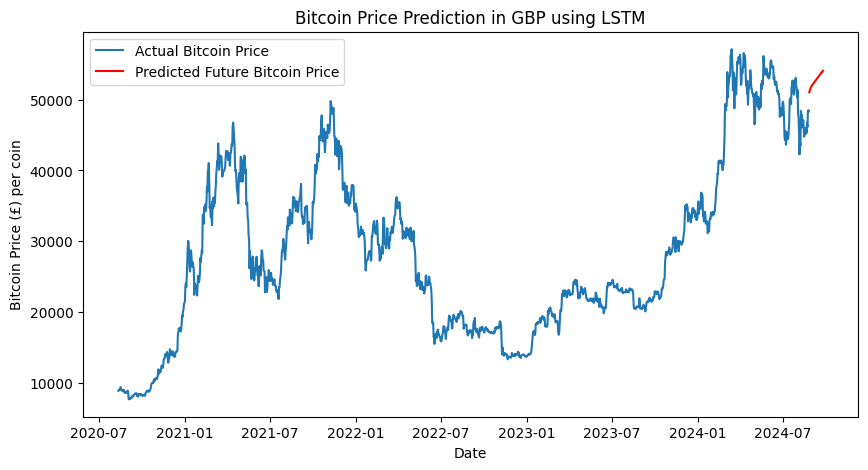

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30 #The number of future days to predict

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped) #look into, multi-step instead?

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=bitcoin_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(bitcoin_history['time_period_start'], bitcoin_history['price_close'], label='Actual Bitcoin Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction in GBP using LSTM')
plt.legend()
plt.show()

LSTM model for Ethereum price prediction:

In [ ]:
#Data scaling:

from sklearn.preprocessing import MinMaxScaler

data = ethereum_history['price_close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

import numpy as np

sequence_length = 30
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
  x_data.append(scaled_data[i-sequence_length:i,0])
  y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1],1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Model creation:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units = 50, return_sequences=False))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs = 2)

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0347
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0033


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Lost: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Test Lost: 0.002896056743338704


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


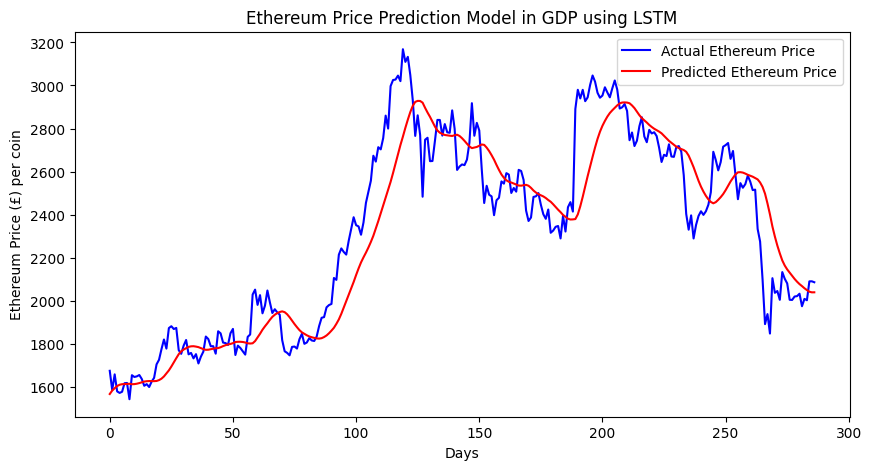

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Ethereum Price')
plt.plot(predictions, color='red', label = 'Predicted Ethereum Price')
plt.xlabel('Days')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction Model in GDP using LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

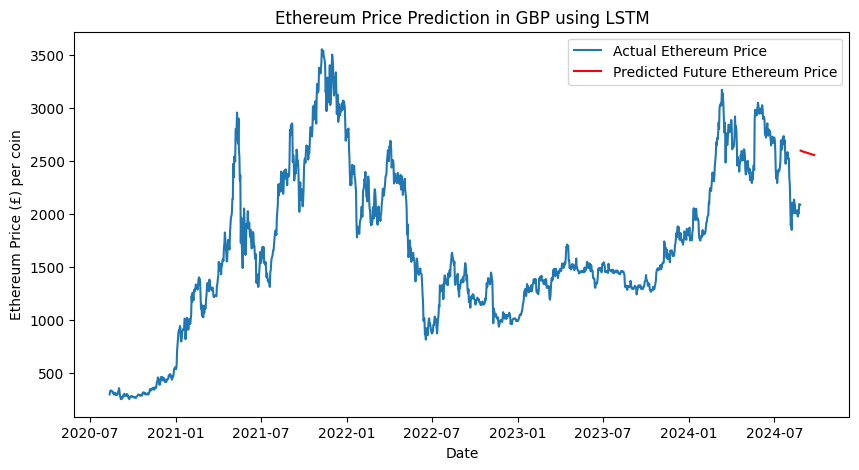

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped)

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=ethereum_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(ethereum_history['time_period_start'], ethereum_history['price_close'], label='Actual Ethereum Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Ethereum Price')
plt.xlabel('Date')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction in GBP using LSTM')
plt.legend()
plt.show()

LSTM model for Dogecoin price prediction:

In [ ]:
#Data scaling:

from sklearn.preprocessing import MinMaxScaler

data = dogecoin_history['price_close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

import numpy as np

sequence_length = 30
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
  x_data.append(scaled_data[i-sequence_length:i,0])
  y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1],1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Model creation:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units = 50, return_sequences=False))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs = 2)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0170
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Lost: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4640e-04  
Test Lost: 0.00012488367792684585


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


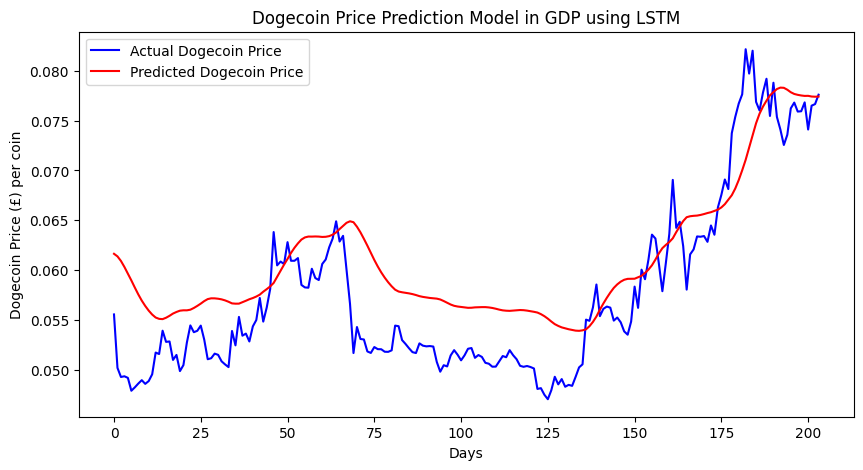

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Dogecoin Price')
plt.plot(predictions, color='red', label = 'Predicted Dogecoin Price')
plt.xlabel('Days')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction Model in GDP using LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

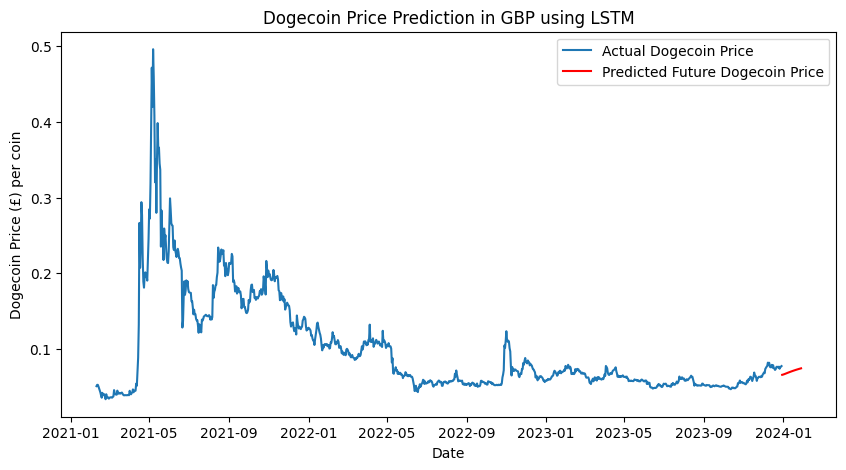

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped)

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=dogecoin_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(dogecoin_history['time_period_start'], dogecoin_history['price_close'], label='Actual Dogecoin Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Dogecoin Price')
plt.xlabel('Date')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction in GBP using LSTM')
plt.legend()
plt.show()

Stacked LSTM for Bitcoin price prediction:








In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
#Data scaling:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(bitcoin_history['price_close'].values.reshape(-1, 1))

In [ ]:
#Create sequences:

sequence_length = 30
x_data, y_data = [], []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Stacked LSTM Model Creation:

model = Sequential()

#Adding multiple LSTM layers with more units and Dropout layers for regularization to reduce overfitting
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - loss: 0.0371
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0046


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0055
Test Loss: 0.006368402857333422


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


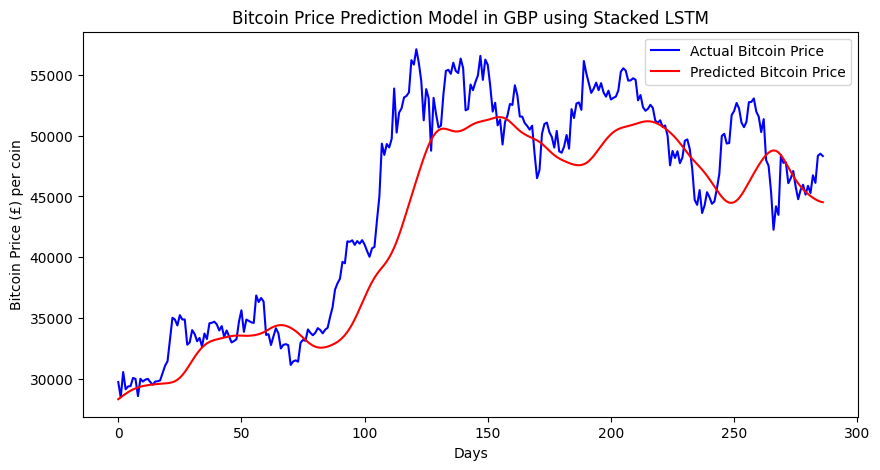

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, color='blue', label='Actual Bitcoin Price')
plt.plot(predictions, color='red', label='Predicted Bitcoin Price')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction Model in GBP using Stacked LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

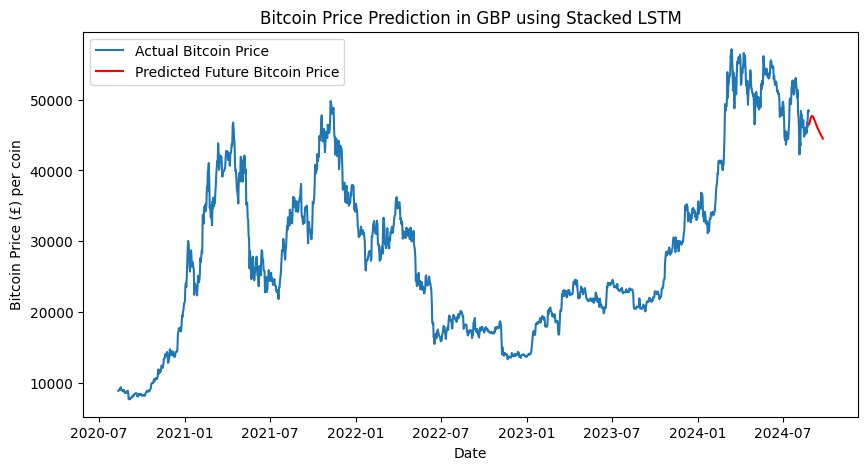

In [ ]:
#Future predictions:

last_sequence = x_data[-sequence_length]
future_predictions = []
future_days = 30

for _ in range(future_days):
    last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))
    next_prediction = model.predict(last_sequence_reshaped)
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=bitcoin_history['time_period_start'].max(), periods=future_days + 1, inclusive='right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(bitcoin_history['time_period_start'], bitcoin_history['price_close'], label='Actual Bitcoin Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction in GBP using Stacked LSTM')
plt.legend()
plt.show()

Stacked LSTM for Ethereum price prediction:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
#Data scaling:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ethereum_history['price_close'].values.reshape(-1, 1))

In [ ]:
#Create sequences:

sequence_length = 30
x_data, y_data = [], []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Stacked LSTM Model Creation:

model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0502
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0062


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0040
Test Loss: 0.005118641071021557


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


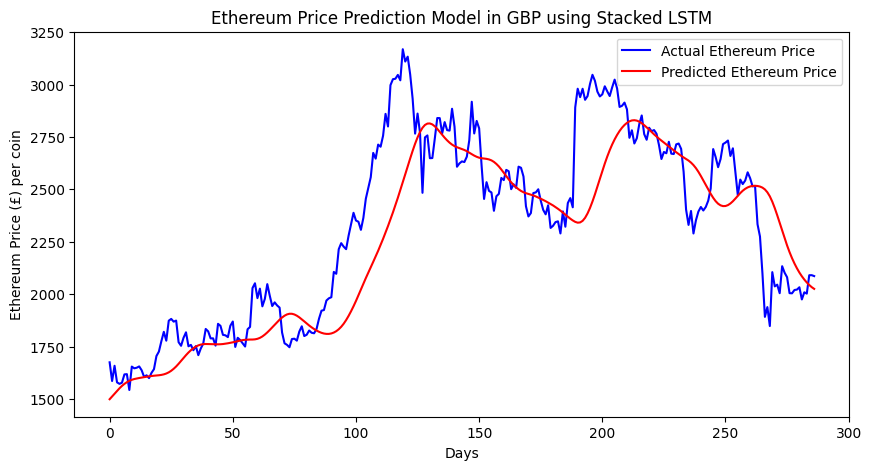

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, color='blue', label='Actual Ethereum Price')
plt.plot(predictions, color='red', label='Predicted Ethereum Price')
plt.xlabel('Days')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction Model in GBP using Stacked LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

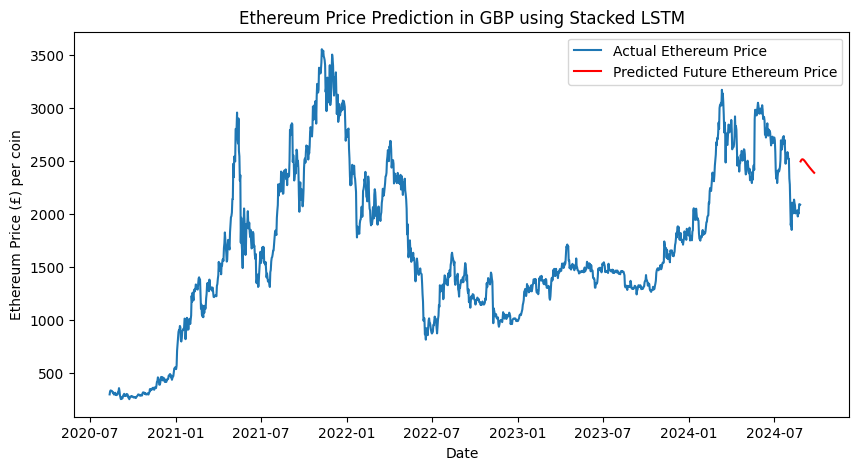

In [ ]:
#Future predictions:

last_sequence = x_data[-sequence_length]
future_predictions = []
future_days = 30

for _ in range(future_days):
    last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))
    next_prediction = model.predict(last_sequence_reshaped)
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=ethereum_history['time_period_start'].max(), periods=future_days + 1, inclusive='right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(ethereum_history['time_period_start'], ethereum_history['price_close'], label='Actual Ethereum Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Ethereum Price')
plt.xlabel('Date')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction in GBP using Stacked LSTM')
plt.legend()
plt.show()

Stacked LSTM for Dogecoin price prediction:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
#Data scaling:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dogecoin_history['price_close'].values.reshape(-1, 1))

In [ ]:
#Create sequences:

sequence_length = 30
x_data, y_data = [], []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Stacked LSTM Model Creation:

model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0127
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0090
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0059


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.5880e-04
Test Loss: 0.000420823460444808


In [ ]:
#Predictions:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


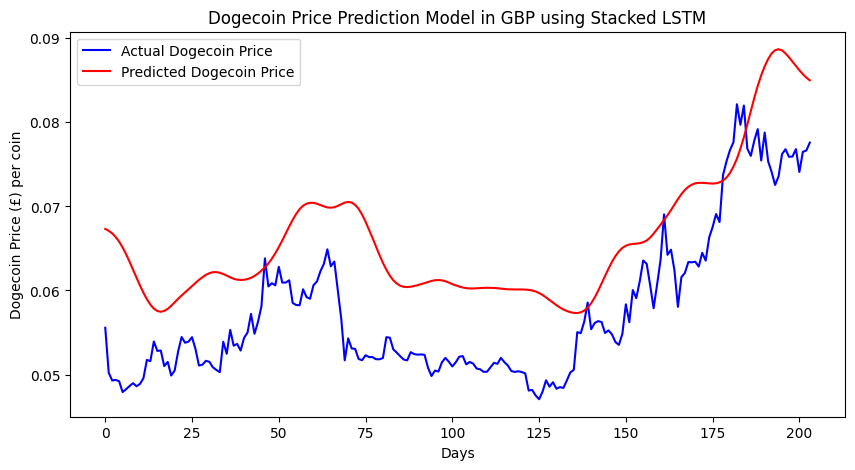

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, color='blue', label='Actual Dogecoin Price')
plt.plot(predictions, color='red', label='Predicted Dogecoin Price')
plt.xlabel('Days')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction Model in GBP using Stacked LSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

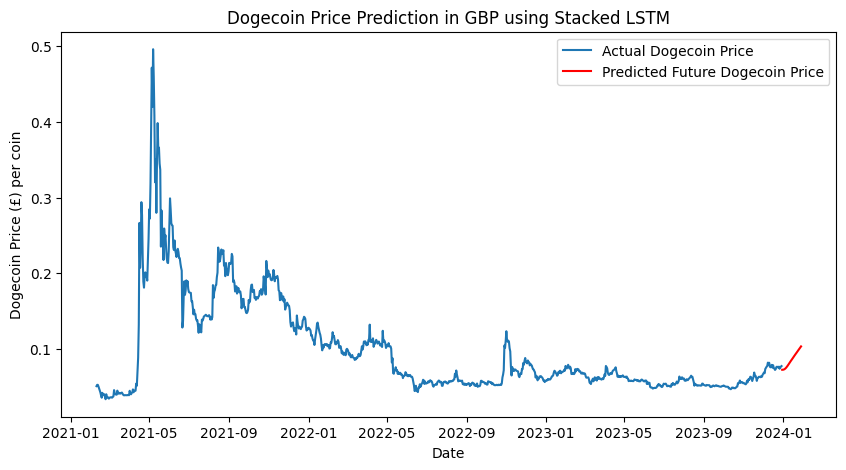

In [ ]:
#Future predictions:

last_sequence = x_data[-sequence_length]
future_predictions = []
future_days = 30

for _ in range(future_days):
    last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))
    next_prediction = model.predict(last_sequence_reshaped)
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=dogecoin_history['time_period_start'].max(), periods=future_days + 1, inclusive='right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(dogecoin_history['time_period_start'], dogecoin_history['price_close'], label='Actual Dogecoin Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Dogecoin Price')
plt.xlabel('Date')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction in GBP using Stacked LSTM')
plt.legend()
plt.show()

xLSTM (with Exponential Gating, Simplified LSTM, and Rich Matrix Interactions) for Bitcoin price prediction

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Layer, Input, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
#Data scaling:

data = bitcoin_history['price_close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

sequence_length = 30
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Custom Exponential Gating Layer:

class ExponentialGating(Layer):
    def __init__(self, units):
        super(ExponentialGating, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=glorot_uniform(),
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        gate = K.exp(K.dot(inputs, self.W) + self.b)
        return gate * inputs

In [ ]:
#Hybrid sLSTM + mLSTM model with Exponential Gating:

input_layer = Input(shape=(x_train.shape[1], 1))

#Scalar LSTM (simplified LSTM)
sLSTM_output = LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1], 1))(input_layer)

#Matrix LSTM (rich matrix interactions)
mLSTM_output = LSTM(units=50, return_sequences=True)(sLSTM_output)

gating = ExponentialGating(50)(mLSTM_output)

final_output = LSTM(units=50, return_sequences=False)(gating)

dense_1 = Dense(units=25)(final_output)
output_layer = Dense(units=1)(dense_1)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0248
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0032


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0063
Test Loss: 0.007519273553043604


In [ ]:
#Predictions:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


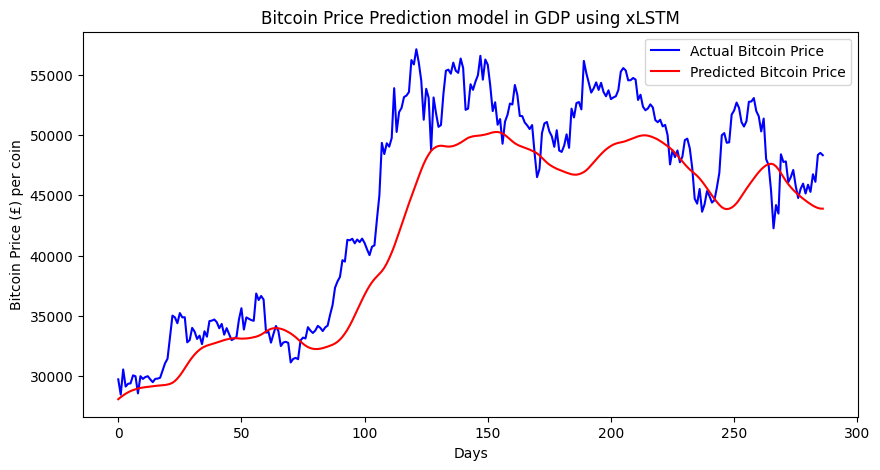

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Bitcoin Price')
plt.plot(predictions, color='red', label = 'Predicted Bitcoin Price')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction model in GDP using xLSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

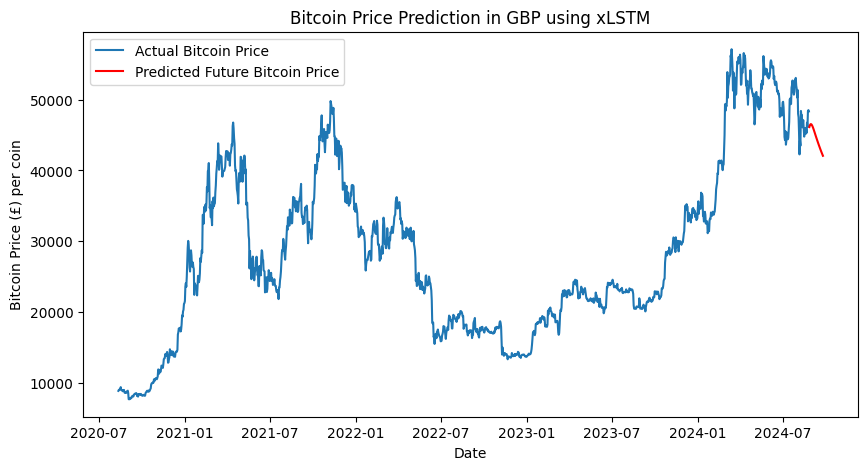

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped)

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=bitcoin_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(bitcoin_history['time_period_start'], bitcoin_history['price_close'], label='Actual Bitcoin Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (£) per coin')
plt.title('Bitcoin Price Prediction in GBP using xLSTM')
plt.legend()
plt.show()

xLSTM (with Exponential Gating, Simplified LSTM, and Rich Matrix Interactions) for Ethereum price prediction

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Layer, Input, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
#Data scaling:

data = ethereum_history['price_close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

sequence_length = 30
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Custom Exponential Gating Layer:

class ExponentialGating(Layer):
    def __init__(self, units):
        super(ExponentialGating, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=glorot_uniform(),
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        gate = K.exp(K.dot(inputs, self.W) + self.b)
        return gate * inputs

In [ ]:
#Hybrid sLSTM + mLSTM model with Exponential Gating:

input_layer = Input(shape=(x_train.shape[1], 1))

#Scalar LSTM (simplified LSTM)
sLSTM_output = LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1], 1))(input_layer)

#Matrix LSTM (rich matrix interactions)
mLSTM_output = LSTM(units=50, return_sequences=True)(sLSTM_output)

gating = ExponentialGating(50)(mLSTM_output)

final_output = LSTM(units=50, return_sequences=False)(gating)

dense_1 = Dense(units=25)(final_output)
output_layer = Dense(units=1)(dense_1)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0490
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0045


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0056
Test Loss: 0.006543484982103109


In [ ]:
#Predictions:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


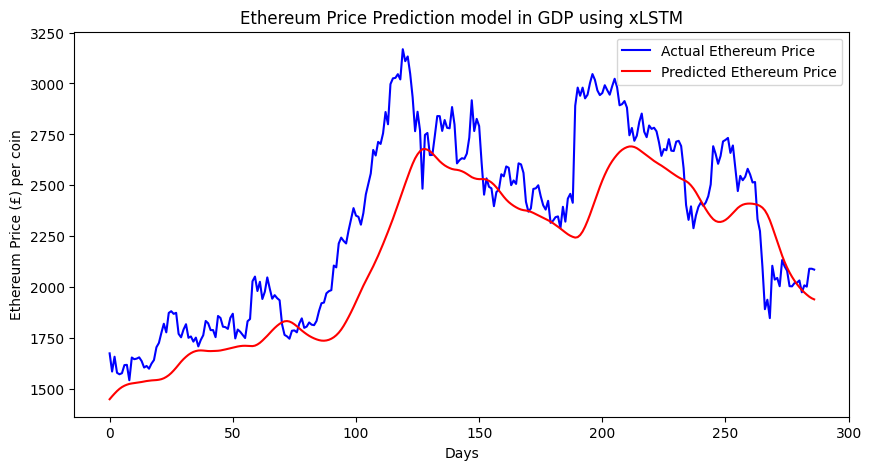

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Ethereum Price')
plt.plot(predictions, color='red', label = 'Predicted Ethereum Price')
plt.xlabel('Days')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction model in GDP using xLSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

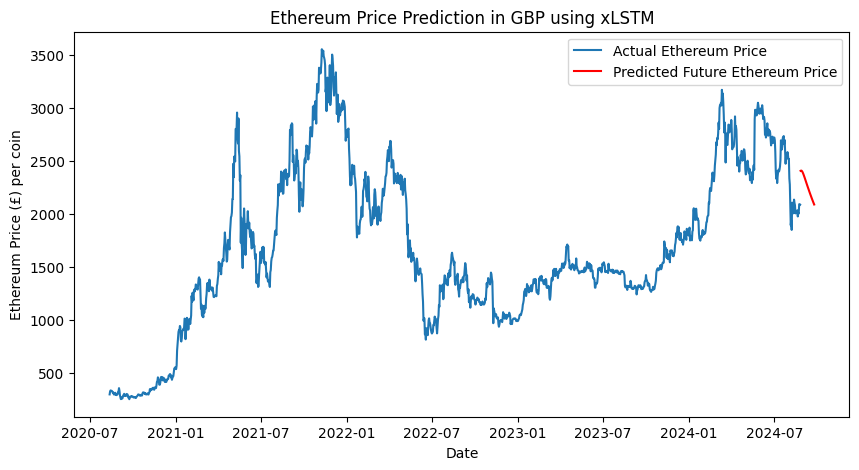

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped)

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=ethereum_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(ethereum_history['time_period_start'], ethereum_history['price_close'], label='Actual Ethereum Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Ethereum Price')
plt.xlabel('Date')
plt.ylabel('Ethereum Price (£) per coin')
plt.title('Ethereum Price Prediction in GBP using xLSTM')
plt.legend()
plt.show()

xLSTM (with Exponential Gating, Simplified LSTM, and Rich Matrix Interactions) for Dogecoin price prediction

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Layer, Input, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
#Data scaling:

data = dogecoin_history['price_close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create sequences:

sequence_length = 30
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
#Training and Test Split:

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
#Custom Exponential Gating Layer:

class ExponentialGating(Layer):
    def __init__(self, units):
        super(ExponentialGating, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=glorot_uniform(),
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        gate = K.exp(K.dot(inputs, self.W) + self.b)
        return gate * inputs

In [ ]:
#Hybrid sLSTM + mLSTM model with Exponential Gating:

input_layer = Input(shape=(x_train.shape[1], 1))

#Scalar LSTM (simplified LSTM)
sLSTM_output = LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1], 1))(input_layer)

#Matrix LSTM (rich matrix interactions)
mLSTM_output = LSTM(units=50, return_sequences=True)(sLSTM_output)

gating = ExponentialGating(50)(mLSTM_output)

final_output = LSTM(units=50, return_sequences=False)(gating)

dense_1 = Dense(units=25)(final_output)
output_layer = Dense(units=1)(dense_1)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model training:

model.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0192
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0055


In [ ]:
#Model evaluation:

loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1365e-05
Test Loss: 9.567271627020091e-05


In [ ]:
#Predictions:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


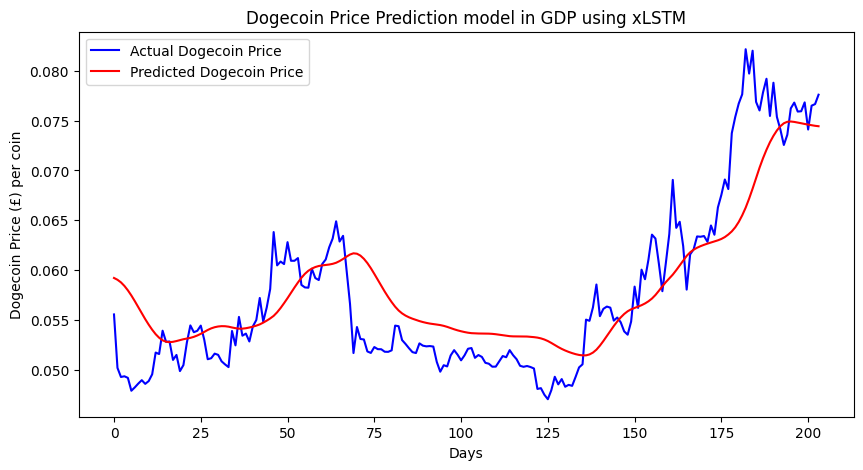

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label = 'Actual Dogecoin Price')
plt.plot(predictions, color='red', label = 'Predicted Dogecoin Price')
plt.xlabel('Days')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction model in GDP using xLSTM')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

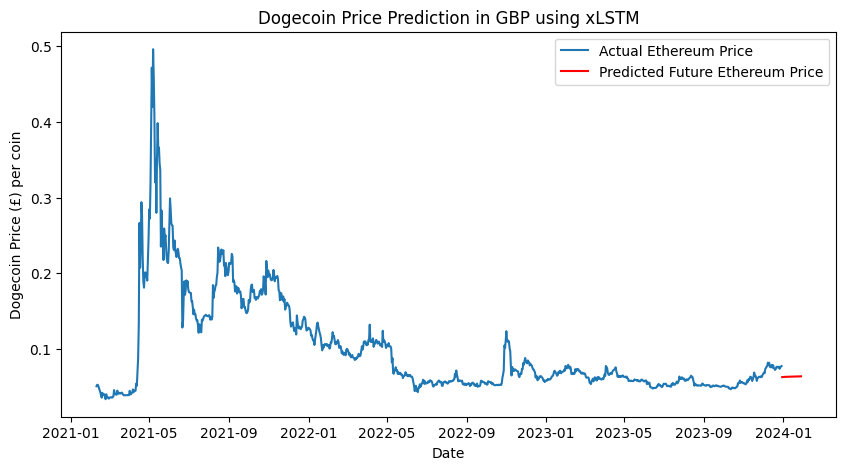

In [ ]:
last_sequence = x_data[-sequence_length]

future_predictions = []

future_days = 30

for _ in  range(future_days):
  last_sequence_reshaped = np.reshape(last_sequence, (1, last_sequence.shape[0], 1))

  next_prediction = model.predict(last_sequence_reshaped)

  future_predictions.append(next_prediction[0,0])

  last_sequence = np.append(last_sequence[1:], next_prediction)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=dogecoin_history['time_period_start'].max(), periods = future_days +1, inclusive= 'right')
future_df = pd.DataFrame(future_predictions, columns=['Predicted Price'], index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(dogecoin_history['time_period_start'], dogecoin_history['price_close'], label='Actual Ethereum Price')
plt.plot(future_df.index, future_df['Predicted Price'], color='red', label='Predicted Future Ethereum Price')
plt.xlabel('Date')
plt.ylabel('Dogecoin Price (£) per coin')
plt.title('Dogecoin Price Prediction in GBP using xLSTM')
plt.legend()
plt.show()